# Exercise 6

## SVM & Regularization


For this homework we consider a set of observations on a number of red and white wine varieties involving their chemical properties and ranking by tasters. Wine industry shows a recent growth spurt as social drinking is on the rise. The price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Pricing of wine depends on such a volatile factor to some extent. Another key factor in wine certification and quality assessment is physicochemical tests which are laboratory-based and takes into account factors like acidity, pH level, presence of sugar and other chemical properties. For the wine market, it would be of interest if human quality of tasting can be related to the chemical properties of wine so that certification and quality assessment and assurance process is more controlled.

Two datasets are available of which one dataset is on red wine and have 1599 different varieties and the other is on white wine and have 4898 varieties. All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

A predictive model developed on this data is expected to provide guidance to vineyards regarding quality and price expected on their produce without heavy reliance on volatility of wine tasters.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_r = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_red.csv')
data_w = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_white.csv')

In [3]:
#data = data_w.assign(type = 'white')

#data = data.append(data_r.assign(type = 'red'), ignore_index=True)
#data.sample(5)

data_w.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3566,7.6,0.380,0.28,4.2,0.029,7.0,112.0,0.99060,3.00,0.41,12.6,6
1558,6.2,0.430,0.49,6.4,0.045,12.0,115.0,0.99630,3.27,0.57,9.0,4
1643,8.1,0.300,0.49,12.3,0.049,50.0,144.0,0.99710,3.09,0.57,10.2,7
2754,5.9,0.170,0.28,0.7,0.027,5.0,28.0,0.98985,3.13,0.32,10.6,5
4489,6.7,0.480,0.49,2.9,0.030,28.0,122.0,0.98926,3.13,0.40,13.0,6
580,7.4,0.410,0.66,10.8,0.051,77.0,194.0,0.99760,3.05,0.46,8.7,5
438,7.4,0.155,0.34,2.3,0.045,73.5,214.0,0.99340,3.18,0.61,9.9,7
186,6.7,0.240,0.41,9.4,0.040,49.0,166.0,0.99540,3.12,0.61,9.9,6
786,7.7,0.340,0.28,11.0,0.040,31.0,117.0,0.99815,3.27,0.29,9.2,6
1504,7.0,0.170,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8


# Exercise 6.1

Show the frecuency table of the quality by type of wine

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

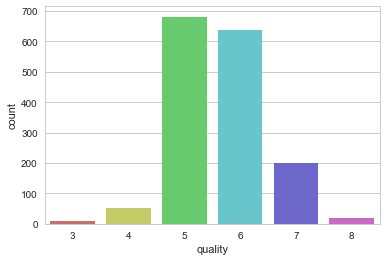

In [5]:
sns.countplot(x='quality',data=data_r,palette= 'hls')
plt.show()

In [6]:
data_r.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

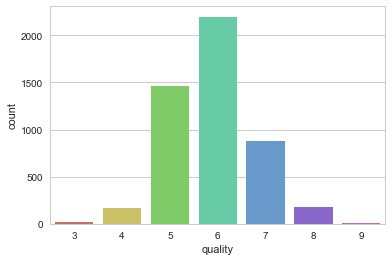

In [7]:
sns.countplot(x='quality',data=data_w,palette= 'hls')
plt.show()

In [8]:
data_w.groupby('quality').size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

# SVM

# Exercise 6.2

* Standarized the features (not the quality)
* Create a binary target for each type of wine
* Create two Linear SVM's for the white and red wines, repectively.


#### Estandarización

In [9]:
data_r_scaled = pd.DataFrame(index=data_r.index)
data_w_scaled = pd.DataFrame(index=data_w.index)

In [10]:
from sklearn import preprocessing

for i in data_r.loc[:, data_r.columns != 'quality'].columns:
    data_r_scaled[i] = preprocessing.scale(data_r[i])
    
for j in data_w.loc[:, data_w.columns != 'quality'].columns:
    data_w_scaled[j] = preprocessing.scale(data_w[j])

 #### Creación de variable respuesta

In [11]:
data_r_scaled['response'] = np.where(data_r['quality']>=7,1,0)
data_w_scaled['response'] = np.where(data_w['quality']>=7,1,0)

In [12]:
data_r_scaled.groupby('response').size()

response
0    1382
1     217
dtype: int64

In [13]:
data_w_scaled.groupby('response').size()

response
0    3838
1    1060
dtype: int64

In [14]:
data_r_scaled['response']=data_r_scaled['response'].astype(bool)
data_w_scaled['response']=data_w_scaled['response'].astype(bool)

In [15]:
data_r_scaled.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,response
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,False
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,False
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,False
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,False
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,False
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,False
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,False
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,True
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,True
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,False


#### Creación SVM

#### Vino rojo

In [16]:
X_r = data_r_scaled.loc[:,:'alcohol']
y_r = data_r_scaled.loc[:,'response']

In [17]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf_r = SVC(kernel='linear')
clf_r.fit(X_r, y_r)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
r1=clf_r.score(X_r, y_r)
print("Score vino rojo - Kernel LINEAR")
print(clf_r.score(X_r, y_r))

Score vino rojo - Kernel LINEAR
0.8642901813633521


#### Vino blanco

In [19]:
X_w = data_w_scaled.loc[:,:'alcohol']
y_w = data_w_scaled.loc[:,'response']

In [20]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf_w = SVC(kernel='linear')
clf_w.fit(X_w, y_w)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
w1=clf_w.score(X_w, y_w)
print("Score vino blanco - Kernel LINEAR")
print(clf_w.score(X_w, y_w))

Score vino blanco - Kernel LINEAR
0.7835851367905268


# Exercise 6.3

Test the two SVM's using the different kernels (‘poly’, ‘rbf’, ‘sigmoid’)


### Kernel: Poly

#### Vino rojo

In [22]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf_r = SVC(kernel='poly',gamma="auto")
clf_r.fit(X_r, y_r)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
r2=clf_r.score(X_r, y_r)
print("Score vino rojo - Kernel POLY")
print(clf_r.score(X_r, y_r))

Score vino rojo - Kernel POLY
0.908692933083177


#### Vino blanco

In [24]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf_w = SVC(kernel='poly',gamma="auto")
clf_w.fit(X_w, y_w)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
w2=clf_w.score(X_w, y_w)
print("Score vino blanco - Kernel POLY")
print(clf_w.score(X_w, y_w))

Score vino blanco - Kernel POLY
0.8156390363413638


### Kernel: rbf

#### Vino rojo

In [26]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf_r = SVC(kernel='rbf',gamma="auto")
clf_r.fit(X_r, y_r)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
r3=clf_r.score(X_r, y_r)
print("Score vino rojo - Kernel RBF")
print(clf_r.score(X_r, y_r))

Score vino rojo - Kernel RBF
0.8986866791744841


#### Vino blanco

In [28]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf_w = SVC(kernel='rbf',gamma="auto")
clf_w.fit(X_w, y_w)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
w3=clf_w.score(X_w, y_w)
print("Score vino blanco - Kernel RBF")
print(clf_w.score(X_w, y_w))

Score vino blanco - Kernel RBF
0.8409554920375664


### Kernel: sigmoid

#### Vino rojo

In [30]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf_r = SVC(kernel='sigmoid',gamma="auto")
clf_r.fit(X_r, y_r)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
r4=clf_r.score(X_r, y_r)
print("Score vino rojo - Kernel SIGMOID")
print(clf_r.score(X_r, y_r))

Score vino rojo - Kernel SIGMOID
0.8311444652908068


#### Vino blanco

In [32]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf_w = SVC(kernel='sigmoid',gamma="auto")
clf_w.fit(X_w, y_w)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
w4=clf_w.score(X_w, y_w)
print("Score vino blanco - Kernel SIGMOID")
print(clf_w.score(X_w, y_w))

Score vino blanco - Kernel SIGMOID
0.7133523887300939


### Mejor kernel


In [34]:
#Tabla de performance para cada kernel
kernels = {'Wine_type': ['Rojo','Rojo','Rojo','Rojo','Blanco','Blanco','Blanco','Blanco'],
           'Kernel':['Linear','Poly','RBF','Sigmoid','Linear','Poly','RBF','Sigmoid'],
           'Score':[r1,r2,r3,r4,w1,w2,w3,w4]
          }

df_ = pd.DataFrame(kernels,columns=['Wine_type','Kernel','Score'])

In [35]:
df_

,Wine_type,Kernel,Score
0,Rojo,Linear,0.864290
1,Rojo,Poly,0.908693
2,Rojo,RBF,0.898687
3,Rojo,Sigmoid,0.831144
4,Blanco,Linear,0.783585
5,Blanco,Poly,0.815639
6,Blanco,RBF,0.840955
7,Blanco,Sigmoid,0.713352


Para cada tipo de vino se corrió SVM cambiando el tipo de kernel: linear, poly, rbf y sigmoid. En el caso del vino rojo el mejor caso de SVM se presenta con el kernel poly, mientras que para el vino blanco el mejor caso de SVM se presenta con el kernel RBF.

# Exercise 6.4
Using the best SVM find the parameters that gives the best performance

'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]

In [36]:
gamma_array = {'gamma':[0.01,0.001,0.0001]}
c_array = {'c':[0.1,1,10,100,1000]}

gamma_iter = pd.DataFrame(gamma_array,columns=['gamma'])
c_iter = pd.DataFrame(c_array,columns=['c'])

resultado = pd.DataFrame(index=c_iter.index, columns=gamma_iter.index)

In [37]:
for i in gamma_iter['gamma'].iteritems():
    for j in c_iter['c'].iteritems():

        from sklearn.svm import SVC # "Support Vector Classifier"
        best_clf_r = SVC(kernel='poly',gamma=i[1],C=j[1])
        best_clf_r.fit(X_r, y_r)   
        resultado[i[0]][j[0]]=best_clf_r.score(X_r, y_r)

In [38]:
resultado.columns = ['0.01', '0.001','0.0001']
resultado.index = ["0.1","1","10","100","1000"]
resultado

,0.01,0.001,0.0001
0.1,0.86429,0.86429,0.86429
1,0.86429,0.86429,0.86429
10,0.865541,0.86429,0.86429
100,0.879925,0.86429,0.86429
1000,0.910569,0.86429,0.86429


Para el caso del vino rojo los parámentros que mejor ajustan el SVM son: gamma=0.01 y c=1000, donde el accuracy score es de 0.91

# Exercise 6.5

Compare the results with other methods

# Regularization

# Exercise 6.6


* Train a linear regression to predict wine quality (Continous)

* Analyze the coefficients

* Evaluate the RMSE

Creación de la variable respuesta para los datos no estandarizados

In [39]:
data_r['response'] = np.where(data_r['quality']>=7,1,0)
data_w['response'] = np.where(data_w['quality']>=7,1,0)

#### Vino rojo

Variable respuesta, variables explicativas y partición de la base para vino rojo

In [40]:
X_r = data_r_scaled.loc[:,:'alcohol']
y_r = data_r_scaled.loc[:,'response']

In [41]:
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_r, y_r, random_state=1)

Regresión lineal vino rojo

In [42]:
from sklearn.linear_model import LinearRegression
lr_r = LinearRegression()
lr_r.fit(Xr_train, yr_train)
print(lr_r.coef_)

[ 0.04630535 -0.03936439  0.01173109  0.02900463 -0.0388415   0.00066512
 -0.02984049 -0.06063468 -0.01483385  0.06190569  0.0866446 ]


In [43]:
yr_pred = lr_r.predict(Xr_test)

In [44]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(yr_test, yr_pred)))

RMSE: 0.28446073702392977


#### Vino blanco

Variable respuesta, variables explicativas y partición de la base para vino blanco

In [45]:
X_w = data_w_scaled.loc[:,:'alcohol']
y_w = data_w_scaled.loc[:,'response']

In [46]:
from sklearn.model_selection import train_test_split
Xw_train, Xw_test, yw_train, yw_test = train_test_split(X_w, y_w, random_state=1)

Regresión lineal vino blanco

In [47]:
from sklearn.linear_model import LinearRegression
lr_w = LinearRegression()
lr_w.fit(Xw_train, yw_train)
print(lr_w.coef_)

[ 0.03596195 -0.02987781 -0.00364902  0.14743294 -0.01215049  0.02586374
 -0.01125274 -0.17864918  0.04895383  0.02625588  0.08046014]


In [48]:
yw_pred = lr_w.predict(Xw_test)

In [49]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(yw_test, yw_pred)))

RMSE: 0.37450627270819364


# Exercise 6.7

* Estimate a ridge regression with alpha equals 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

#### Vino rojo

In [50]:
# alpha=0.1
from sklearn.linear_model import Ridge
ridgereg_r = Ridge(alpha=0.1, normalize=True)
ridgereg_r.fit(Xr_train, yr_train)
yr_pred = ridgereg_r.predict(Xr_test)
print(ridgereg_r.coef_)
print(np.sqrt(metrics.mean_squared_error(yr_test, yr_pred)))

[ 0.02895991 -0.03902609  0.01743504  0.02160401 -0.0355135  -0.00057645
 -0.02798261 -0.0444929  -0.01747081  0.05403442  0.0868928 ]
0.28381295774459386


In [51]:
# alpha=1
from sklearn.linear_model import Ridge
ridgereg_r = Ridge(alpha=1, normalize=True)
ridgereg_r.fit(Xr_train, yr_train)
yr_pred = ridgereg_r.predict(Xr_test)
print(ridgereg_r.coef_)
print(np.sqrt(metrics.mean_squared_error(yr_test, yr_pred)))

[ 0.0132711  -0.03147716  0.02010845  0.00931349 -0.01897159 -0.00430832
 -0.01739563 -0.02411709 -0.00861624  0.02959549  0.0561034 ]
0.286213078627286


#### Vino blanco

In [52]:
# alpha=0.1
from sklearn.linear_model import Ridge
ridgereg_w = Ridge(alpha=0.1, normalize=True)
ridgereg_w.fit(Xw_train, yw_train)
yw_pred = ridgereg_w.predict(Xw_test)
print(ridgereg_w.coef_)
print(np.sqrt(metrics.mean_squared_error(yw_test, yw_pred)))

[ 0.00624771 -0.02765957 -0.00316241  0.0569254  -0.02142435  0.02654574
 -0.01580322 -0.05943845  0.02417077  0.01785435  0.11562642]
0.37673992370799814


In [53]:
# alpha=1
from sklearn.linear_model import Ridge
ridgereg_w = Ridge(alpha=1, normalize=True)
ridgereg_w.fit(Xw_train, yw_train)
yw_pred = ridgereg_w.predict(Xw_test)
print(ridgereg_w.coef_)
print(np.sqrt(metrics.mean_squared_error(yw_test, yw_pred)))

[-0.00447162 -0.01349291 -0.00094729  0.00746632 -0.02387114  0.01052694
 -0.0129028  -0.02993252  0.01211427  0.00924476  0.06201718]
0.38635433531025165


# Exercise 6.8

* Estimate a lasso regression with alpha equals 0.01, 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

#### Vino rojo

In [54]:
# alpha=0.01
from sklearn.linear_model import Lasso
lassoreg_r = Lasso(alpha=0.01, normalize=True)
lassoreg_r.fit(Xr_train, yr_train)
yr_pred = lassoreg_r.predict(Xr_test)
print(lassoreg_r.coef_)
print(np.sqrt(metrics.mean_squared_error(yr_test, yr_pred)))

[ 0. -0.  0.  0. -0. -0. -0. -0. -0.  0.  0.]
0.317493040268925


In [55]:
# alpha=0.1
from sklearn.linear_model import Lasso
lassoreg_r = Lasso(alpha=0.1, normalize=True)
lassoreg_r.fit(Xr_train, yr_train)
yr_pred = lassoreg_r.predict(Xr_test)
print(lassoreg_r.coef_)
print(np.sqrt(metrics.mean_squared_error(yr_test, yr_pred)))

[ 0. -0.  0.  0. -0. -0. -0. -0. -0.  0.  0.]
0.317493040268925


In [56]:
# alpha=1
from sklearn.linear_model import Lasso
lassoreg_r = Lasso(alpha=1, normalize=True)
lassoreg_r.fit(Xr_train, yr_train)
yr_pred = lassoreg_r.predict(Xr_test)
print(lassoreg_r.coef_)
print(np.sqrt(metrics.mean_squared_error(yr_test, yr_pred)))

[ 0. -0.  0.  0. -0. -0. -0. -0. -0.  0.  0.]
0.317493040268925


#### Vino blanco

In [57]:
# alpha=0.01
from sklearn.linear_model import Lasso
lassoreg_w = Lasso(alpha=0.01, normalize=True)
lassoreg_w.fit(Xw_train, yw_train)
yw_pred = lassoreg_r.predict(Xw_test)
print(lassoreg_w.coef_)
print(np.sqrt(metrics.mean_squared_error(yw_test, yw_pred)))

[-0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.]
0.42435715129948487


In [58]:
# alpha=0.1
from sklearn.linear_model import Lasso
lassoreg_w = Lasso(alpha=0.1, normalize=True)
lassoreg_w.fit(Xw_train, yw_train)
yw_pred = lassoreg_r.predict(Xw_test)
print(lassoreg_w.coef_)
print(np.sqrt(metrics.mean_squared_error(yw_test, yw_pred)))

[-0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.]
0.42435715129948487


In [59]:
# alpha=1
from sklearn.linear_model import Lasso
lassoreg_w = Lasso(alpha=1, normalize=True)
lassoreg_w.fit(Xw_train, yw_train)
yw_pred = lassoreg_r.predict(Xw_test)
print(lassoreg_w.coef_)
print(np.sqrt(metrics.mean_squared_error(yw_test, yw_pred)))

[-0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.]
0.42435715129948487


# Exercise 6.9

* Create a binary target

* Train a logistic regression to predict wine quality (binary)

* Analyze the coefficients

* Evaluate the f1score

#### Vino rojo

In [60]:
X_r = data_r.loc[:,:'alcohol']
y_r = data_r.loc[:,'response']

In [61]:
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_r, y_r, random_state=1)

In [62]:
from sklearn.linear_model import LogisticRegression
logreg_r = LogisticRegression(C=1e9,solver='liblinear',multi_class='ovr')
logreg_r.fit(Xr_train, yr_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [63]:
# examine the coefficients
print(logreg_r.coef_)

[[  0.01328886  -3.71614267  -0.20959607   0.13489944 -11.90254804
    0.02334655  -0.02201683  -2.93158945  -1.91683349   3.43694096
    0.95768815]]


In [64]:
yr_pred = logreg_r.predict(Xr_test)

In [77]:
from sklearn.metrics import f1_score
print(metrics.f1_score(yr_test, yr_pred))
print(metrics.classification_report(yr_test, yr_pred))

0.37333333333333335
             precision    recall  f1-score   support

          0       0.92      0.95      0.94       355
          1       0.47      0.31      0.37        45

avg / total       0.87      0.88      0.87       400



#### Vino blanco

In [66]:
X_w = data_w.loc[:,:'alcohol']
y_w = data_w.loc[:,'response']

In [67]:
from sklearn.model_selection import train_test_split
Xw_train, Xw_test, yw_train, yw_test = train_test_split(X_w, y_w, random_state=1)

In [68]:
from sklearn.linear_model import LogisticRegression
logreg_w = LogisticRegression(C=1e9,solver='liblinear',multi_class='ovr')
logreg_w.fit(Xw_train, yw_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [69]:
# examine the coefficients
print(logreg_w.coef_)

[[ 7.08578525e-02 -4.20010278e+00 -1.40061312e+00  6.16688647e-02
  -8.91419982e+00  1.25352404e-02 -3.14078991e-03 -7.24884511e+00
   1.11237125e+00  1.09638839e+00  8.95921821e-01]]


In [70]:
yw_pred = logreg_w.predict(Xw_test)

In [76]:
from sklearn.metrics import f1_score
print(metrics.f1_score(yw_test, yw_pred))
print(metrics.classification_report(yw_test, yw_pred))

0.36082474226804123
             precision    recall  f1-score   support

          0       0.82      0.95      0.88       951
          1       0.61      0.26      0.36       274

avg / total       0.77      0.80      0.76      1225



# Exercise 6.10

* Estimate a regularized logistic regression using:
* C = 0.01, 0.1 & 1.0
* penalty = ['l1, 'l2']
* Compare the coefficients and the f1score

#### Vino rojo

In [84]:
# standardize X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xr_train = Xr_train.astype(float)
Xr_test = Xr_test.astype(float)
scaler.fit(Xr_train)
Xr_train_scaled = scaler.transform(Xr_train)
Xr_test_scaled = scaler.transform(Xr_test)

In [85]:
# try C=0.01 with L1 penalty
logreg_r = LogisticRegression(C=0.01, penalty='l1',solver='liblinear',multi_class='ovr')
logreg_r.fit(Xr_train_scaled, yr_train)
print(logreg_r.coef_)
print(metrics.f1_score(yr_test, yr_pred))
print(metrics.classification_report(yr_test, yr_pred))

[[ 0.         -0.04023377  0.          0.          0.          0.
   0.          0.          0.          0.          0.30841664]]
0.37333333333333335
             precision    recall  f1-score   support

          0       0.92      0.95      0.94       355
          1       0.47      0.31      0.37        45

avg / total       0.87      0.88      0.87       400



In [86]:
# try C=0.1 with L1 penalty
logreg_r = LogisticRegression(C=0.1, penalty='l1',solver='liblinear',multi_class='ovr')
logreg_r.fit(Xr_train_scaled, yr_train)
print(logreg_r.coef_)
print(metrics.f1_score(yr_test, yr_pred))
print(metrics.classification_report(yr_test, yr_pred))

[[ 0.0345644  -0.54846632  0.          0.00383691 -0.22150777  0.
  -0.26392134  0.         -0.15708513  0.3985779   0.88789595]]
0.37333333333333335
             precision    recall  f1-score   support

          0       0.92      0.95      0.94       355
          1       0.47      0.31      0.37        45

avg / total       0.87      0.88      0.87       400



In [89]:
# try C=0.01 with L2 penalty
logreg_r = LogisticRegression(C=0.01, penalty='l2',solver='liblinear',multi_class='ovr')
logreg_r.fit(Xr_train_scaled, yr_train)
print(logreg_r.coef_)
print(metrics.f1_score(yr_test, yr_pred))
print(metrics.classification_report(yr_test, yr_pred))

[[ 0.09787554 -0.21664386  0.11441425  0.06779689 -0.14318555 -0.01489745
  -0.134284   -0.16803975 -0.0633881   0.21993611  0.38450383]]
0.37333333333333335
             precision    recall  f1-score   support

          0       0.92      0.95      0.94       355
          1       0.47      0.31      0.37        45

avg / total       0.87      0.88      0.87       400



In [90]:
# try C=0.1 with L2 penalty
logreg_r = LogisticRegression(C=0.1, penalty='l2',solver='liblinear',multi_class='ovr')
logreg_r.fit(Xr_train_scaled, yr_train)
print(logreg_r.coef_)
print(metrics.f1_score(yr_test, yr_pred))
print(metrics.classification_report(yr_test, yr_pred))

[[ 0.22562399 -0.43526712  0.08090423  0.18064489 -0.33941735  0.07760623
  -0.39413325 -0.30054942 -0.12315759  0.46454466  0.6859149 ]]
0.37333333333333335
             precision    recall  f1-score   support

          0       0.92      0.95      0.94       355
          1       0.47      0.31      0.37        45

avg / total       0.87      0.88      0.87       400



#### Vino blanco

In [87]:
# standardize X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xw_train = Xw_train.astype(float)
Xw_test = Xw_test.astype(float)
scaler.fit(Xw_train)
Xw_train_scaled = scaler.transform(Xw_train)
Xw_test_scaled = scaler.transform(Xw_test)

In [88]:
# try C=0.01 with L1 penalty
logreg_w = LogisticRegression(C=0.01, penalty='l1',solver='liblinear',multi_class='ovr')
logreg_w.fit(Xw_train_scaled, yw_train)
print(logreg_w.coef_)
print(metrics.f1_score(yw_test, yw_pred))
print(metrics.classification_report(yw_test, yw_pred))

[[ 0.10513668 -0.33410711 -0.052508    0.55107258 -0.34761038  0.14506386
  -0.03166446 -0.52548951  0.22444785  0.12482736  0.74930611]]
0.36082474226804123
             precision    recall  f1-score   support

          0       0.82      0.95      0.88       951
          1       0.61      0.26      0.36       274

avg / total       0.77      0.80      0.76      1225



In [91]:
# try C=0.1 with L1 penalty
logreg_w = LogisticRegression(C=0.1, penalty='l1',solver='liblinear',multi_class='ovr')
logreg_w.fit(Xw_train_scaled, yw_train)
print(logreg_w.coef_)
print(metrics.f1_score(yw_test, yw_pred))
print(metrics.classification_report(yw_test, yw_pred))

[[ 0.10438231 -0.33413041 -0.05254101  0.54880666 -0.34781615  0.14517822
  -0.03183658 -0.52181327  0.22384747  0.12463341  0.75104377]]
0.36082474226804123
             precision    recall  f1-score   support

          0       0.82      0.95      0.88       951
          1       0.61      0.26      0.36       274

avg / total       0.77      0.80      0.76      1225



In [92]:
# try C=0.1 with L2 penalty
logreg_w = LogisticRegression(C=0.1, penalty='l2',solver='liblinear',multi_class='ovr')
logreg_w.fit(Xw_train_scaled, yw_train)
print(logreg_w.coef_)
print(metrics.f1_score(yw_test, yw_pred))
print(metrics.classification_report(yw_test, yw_pred))

[[ 0.20943978 -0.34716073 -0.08425733  0.75758838 -0.36030914  0.18143134
  -0.06972955 -0.8171106   0.30264376  0.1567513   0.62065764]]
0.36082474226804123
             precision    recall  f1-score   support

          0       0.82      0.95      0.88       951
          1       0.61      0.26      0.36       274

avg / total       0.77      0.80      0.76      1225



In [93]:
# try C=0.01 with L2 penalty
logreg_w = LogisticRegression(C=0.01, penalty='l2',solver='liblinear',multi_class='ovr')
logreg_w.fit(Xw_train_scaled, yw_train)
print(logreg_w.coef_)
print(metrics.f1_score(yw_test, yw_pred))
print(metrics.classification_report(yw_test, yw_pred))

[[ 0.03978779 -0.20583929 -0.03605984  0.26421405 -0.24244797  0.14439889
  -0.08866439 -0.27645694  0.14604219  0.09536205  0.60562424]]
0.36082474226804123
             precision    recall  f1-score   support

          0       0.82      0.95      0.88       951
          1       0.61      0.26      0.36       274

avg / total       0.77      0.80      0.76      1225

